In [160]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import ascii
import celerite

from astropy import units as u
from astropy import constants as const
import numpy as np
# Import lmfit to fit a guassian to each specrtrum:
from lmfit import Model, minimize, Parameters, report_fit
from lmfit.models import GaussianModel, PolynomialModel
import pickle as pkl
import csv

In [1001]:
# Load the 67 Data:
OHdata67 = ascii.read('C:/Users/seven/OneDrive/Documents/OH Data 1667 Profile/OH157350p2200_67.ascii', data_start=4)
vel67 = OHdata67['col1']
Ta67 = OHdata67['col2']

# Galactic range choice:
igood = np.where((vel67 >= -100) & (vel67 <= 100))
# Select Galactic range:
vel67 = vel67[igood]
Ta67 = Ta67[igood]

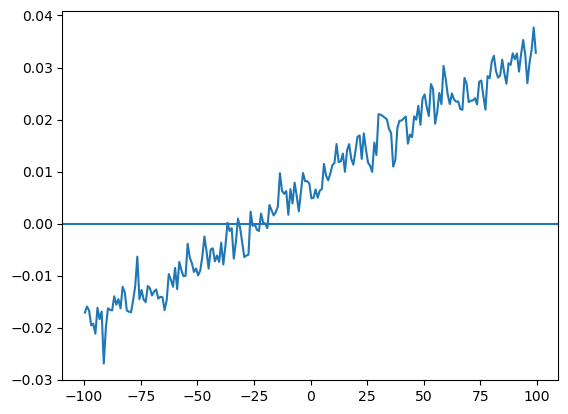

In [1002]:
plt.plot(vel67, Ta67)
plt.axhline(0)

In [1003]:
# Fitting the background:
mod = PolynomialModel(degree=3)

# Baseline regions:
igoodNeg = list(np.where((vel67 >= -100) & (vel67 <= -50))[0])
igoodPos = list(np.where((vel67 >= 30) & (vel67 <= 100))[0])

igood = igoodNeg + igoodPos

# Do the fitting:
pars = mod.guess(Ta67[igood], x=vel67[igood])
out = mod.fit(Ta67[igood], pars, x=vel67[igood])

(-100.0, 100.0)

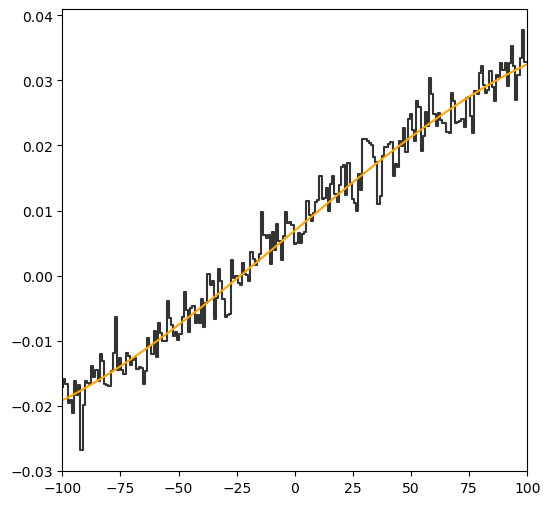

In [1004]:
#plotting the polynomial
x = np.linspace(-100, 100, 216)
y_eval = mod.eval(pars, x=x)

igood = list(np.where((vel67 >= -100) & (vel67 <= 100))[0])

fig, ax = plt.subplots(figsize=(6,6))
ax.step(vel67[igood], Ta67[igood], color='k', alpha=0.8, ls='solid')

plt.plot(x, y_eval, 'orange')
ax.set_xlim([-100, 100])
#ax.set_ylim([-0.02, 0.06])

In [1005]:
#subtracting order 6 polynomial
Ta67sub = Ta67[igood]-y_eval

In [1006]:
# Fitting the background:
mod = PolynomialModel(degree=3)

# Baseline regions:
igoodNeg = list(np.where((vel67 >= -100) & (vel67 <= -50))[0])
igoodPos = list(np.where((vel67 >= 30) & (vel67 <= 100))[0])

igood = igoodNeg + igoodPos

# Do the fitting:
pars = mod.guess(Ta67sub[igood], x=vel67[igood])
out = mod.fit(Ta67sub[igood], pars, x=vel67[igood])

In [1007]:
#assign parameters for a ne Ta axis
x = np.linspace(-100, 100, 216)
y_eval = mod.eval(pars, x=x)

igood = list(np.where((vel67 >= -100) & (vel67 <= 100))[0])


#assign new Ta axis value
Ta67sub = Ta67sub-y_eval

(-0.02, 0.1)

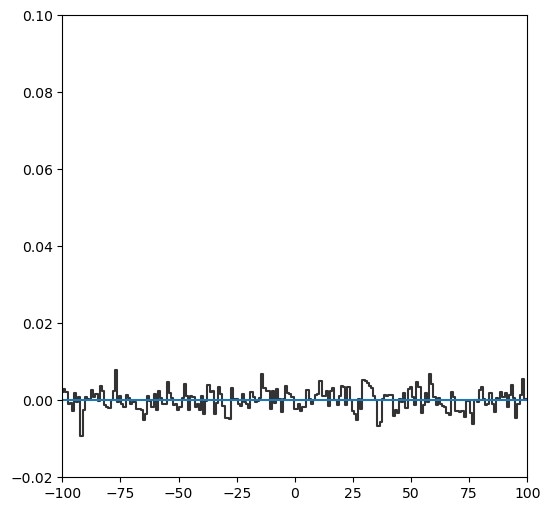

In [1008]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.step(vel67, Ta67sub, color='k', alpha=0.8, ls='solid')
ax.axhline(0)
ax.set_xlim([-100, 100])
ax.set_ylim([-0.02, 0.1])

#Baseline subtraction completed

In [1009]:
#saving the baseline subtracted data

#first quotations are the name of the file
with open('OH157350p2200_67basesub.txt', 'w') as f:
    writer = csv.writer(f, delimiter = '\t')
    
    #columns are vel and Ta
    writer.writerows(zip(vel67, Ta67sub))
    